In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing dataset

1.Since data is in form of excel file we have to use pandas read_excel to load the data

2.After loading it is important to check null values in a column or a row

3.If it is present then following can be done,

    a.Filling NaN values with mean, median and mode using fillna() method
    
    b.If Less missing values, we can drop it as well

In [2]:
df=pd.read_excel('C:\\Users\\Lenovo\\Downloads\\Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# very less null value so drop it
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

From description we can see that Date_of_Journey is a object data type,

 Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,bcz our 
 model will not be able to understand Theses string values,it just understand Time-stamp
For this we require pandas to_datetime to convert object data type to datetime dtype.


dt.day method will extract only day of that date

dt.month method will extract only month of that date

In [10]:
# chenge obj to datetime

def change_data(col):
    df[col]=pd.to_datetime(df[col])

In [11]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_data(i)

In [13]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
# ml isit not support datetym so convert into day and month and drop date_of_journey col

df['Journey_day']=df['Date_of_Journey'].dt.day
df['Journey_month']=df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey',axis=1,inplace=True)

In [15]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-05-20 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-20 05:50:00,2021-05-20 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-20 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-05-20 18:05:00,2021-05-20 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-05-20 16:50:00,2021-05-20 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [16]:
def extrect_time(df1,col):
    df1[col+'hours']=df1[col].dt.hour
    df1[col+'min']=df1[col].dt.minute

In [17]:
extrect_time(df,'Dep_Time')

In [18]:
df.drop('Dep_Time',axis=1,inplace=True)

In [19]:
extrect_time(df,'Arrival_Time')
df.drop('Arrival_Time',axis=1,inplace=True)

In [20]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Timehours,Dep_Timemin,Arrival_Timehours,Arrival_Timemin
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [21]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Dep_Timehours', 'Dep_Timemin', 'Arrival_Timehours', 'Arrival_Timemin'],
      dtype='object')

In [22]:
df.shape

(10682, 14)

#### Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [23]:
df['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [24]:
'2h 50m'.split(' ')

['2h', '50m']

In [25]:
Duration=list(df['Duration'])
for i in range(len(Duration)):
    if len(Duration[i].split(' '))==2:
        pass
    else:
        if 'h' in Duration[i]:
            Duration[i]=Duration[i]+' 0m'
        else:
            Duration[i]='0h '+Duration[i]

In [26]:

df['Duration']=Duration

In [27]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Timehours,Dep_Timemin,Arrival_Timehours,Arrival_Timemin
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [28]:
l='22h 50m'.split(' ')
l[0][0]

'2'

In [29]:
def hour(x):
    return x.split(' ')[0][:-1]

In [30]:
def minu(x):
    return x.split(' ')[1][:-1]

In [31]:
df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_min']=df['Duration'].apply(minu)
df.drop('Duration',axis=1,inplace=True)

In [32]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Timehours,Dep_Timemin,Arrival_Timehours,Arrival_Timemin,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [33]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Dep_Timehours         int64
Dep_Timemin           int64
Arrival_Timehours     int64
Arrival_Timemin       int64
Duration_hours       object
Duration_min         object
dtype: object

In [34]:
df['Duration_hours']=df['Duration_hours'].astype('int')
df['Duration_min']=df['Duration_min'].astype('int')

#### Handling Categorical Data

#### We are using 2 main Encoding Techniques to convert Categorical data into some numerical format

 Nominal data --> data are not in any order --> OneHotEncoder is used in this case

 Ordinal data --> data are in order -->       LabelEncoder is used in this case

In [35]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Dep_Timehours         int64
Dep_Timemin           int64
Arrival_Timehours     int64
Arrival_Timemin       int64
Duration_hours        int32
Duration_min          int32
dtype: object

In [36]:
cat_col=[col for col in df.columns if df[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [37]:
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Timehours',
 'Dep_Timemin',
 'Arrival_Timehours',
 'Arrival_Timemin',
 'Duration_hours',
 'Duration_min']

In [38]:
for i in cat_col:
    print(i,df[i].nunique())
    

Airline 12
Source 5
Destination 6
Route 128
Total_Stops 5
Additional_Info 10


In [39]:
cat=df[cat_col]
cat.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [40]:
cat.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682
unique,12,5,6,128,5,10
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
freq,3849,4536,4536,2376,5625,8344


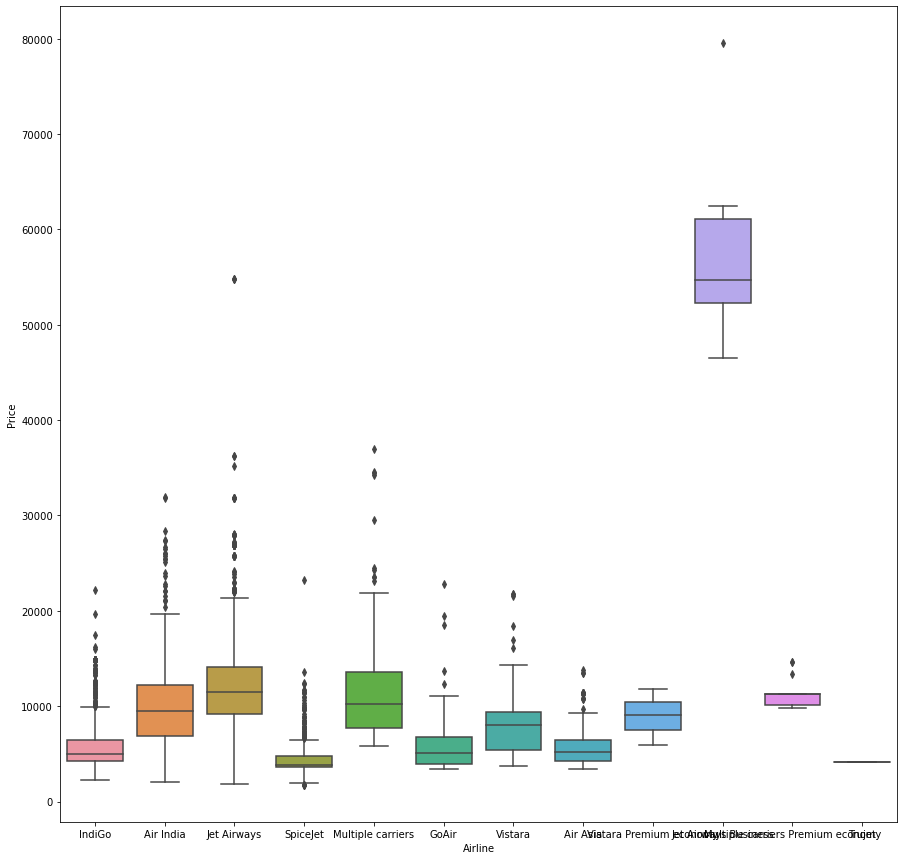

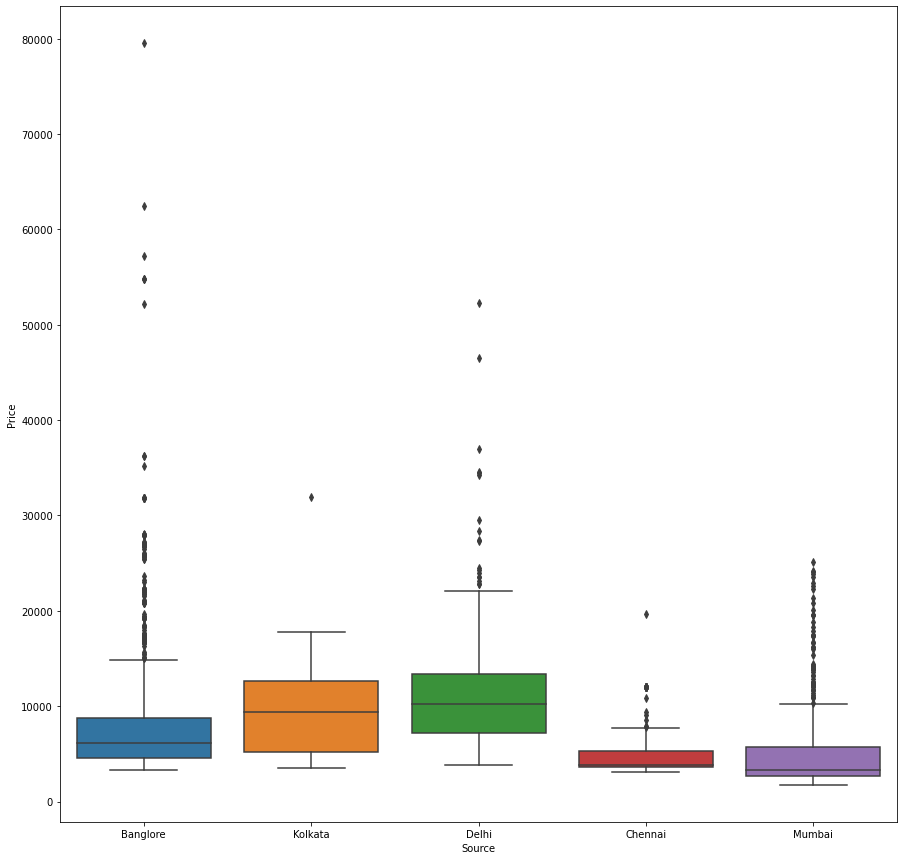

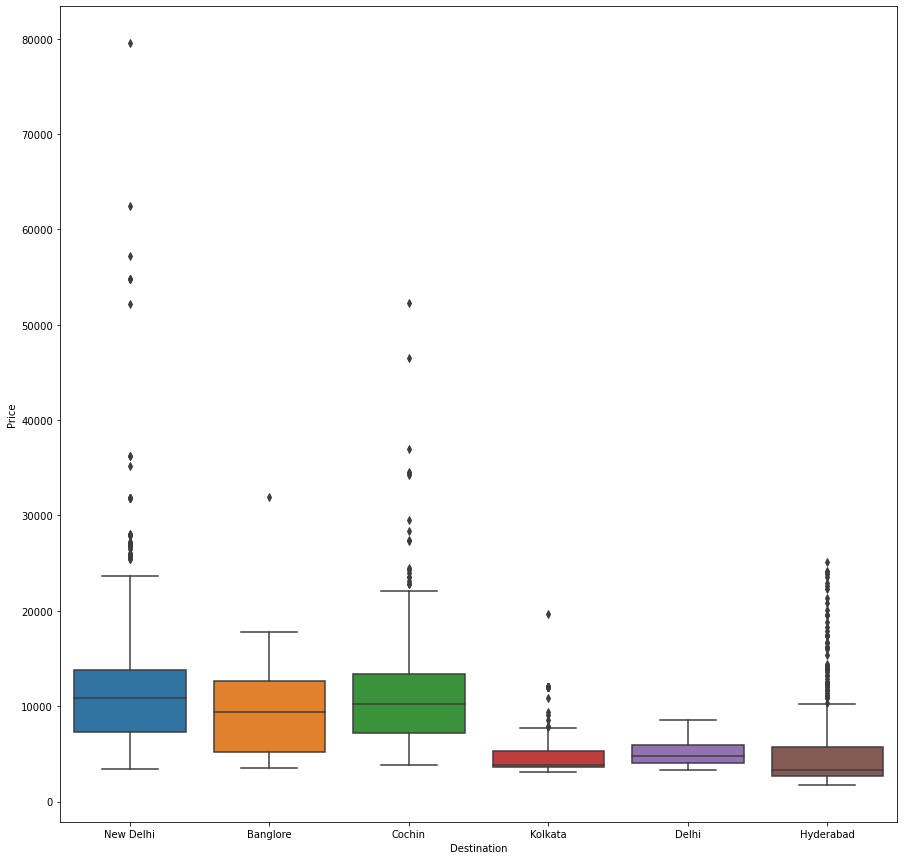

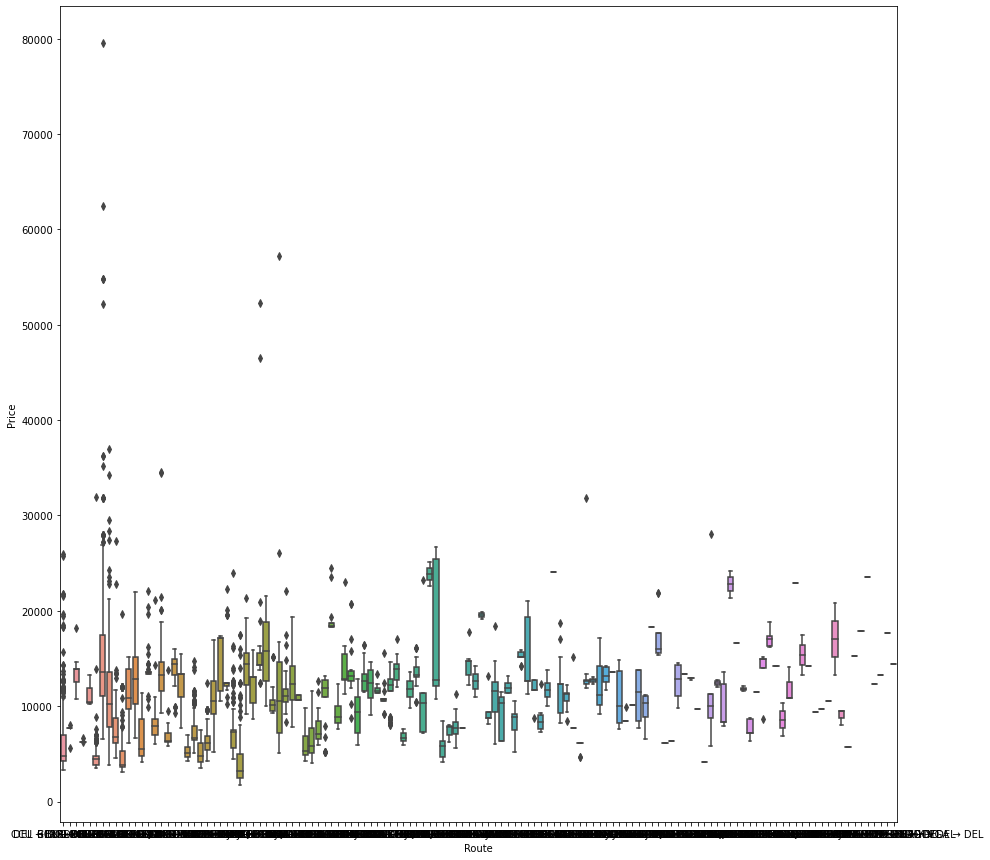

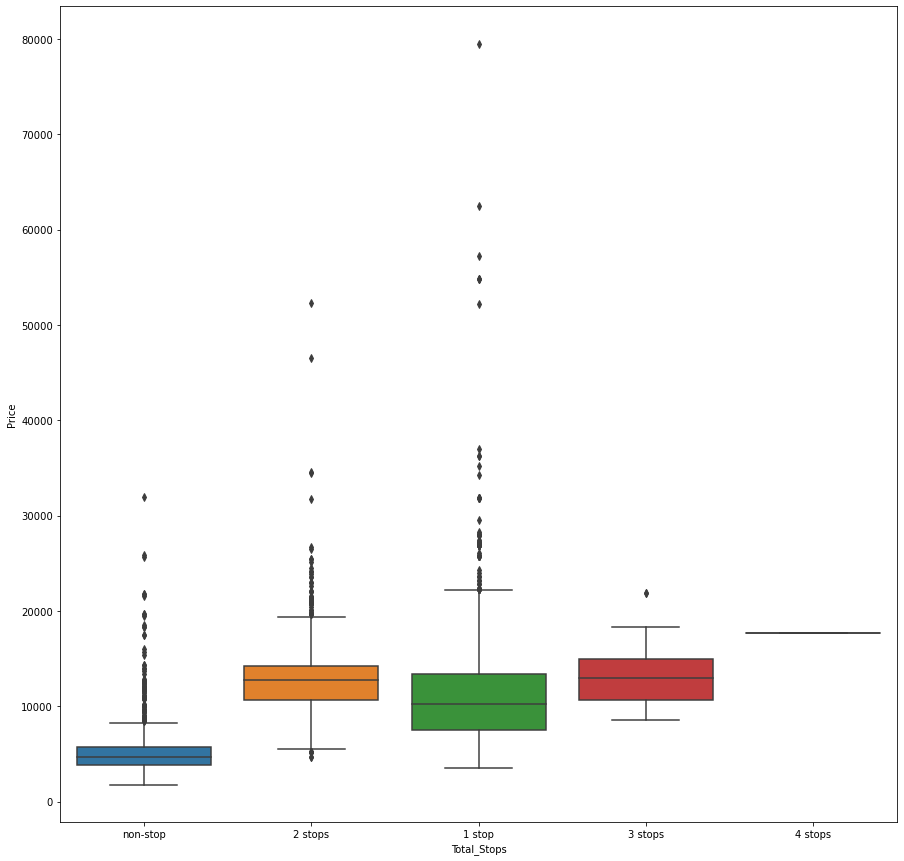

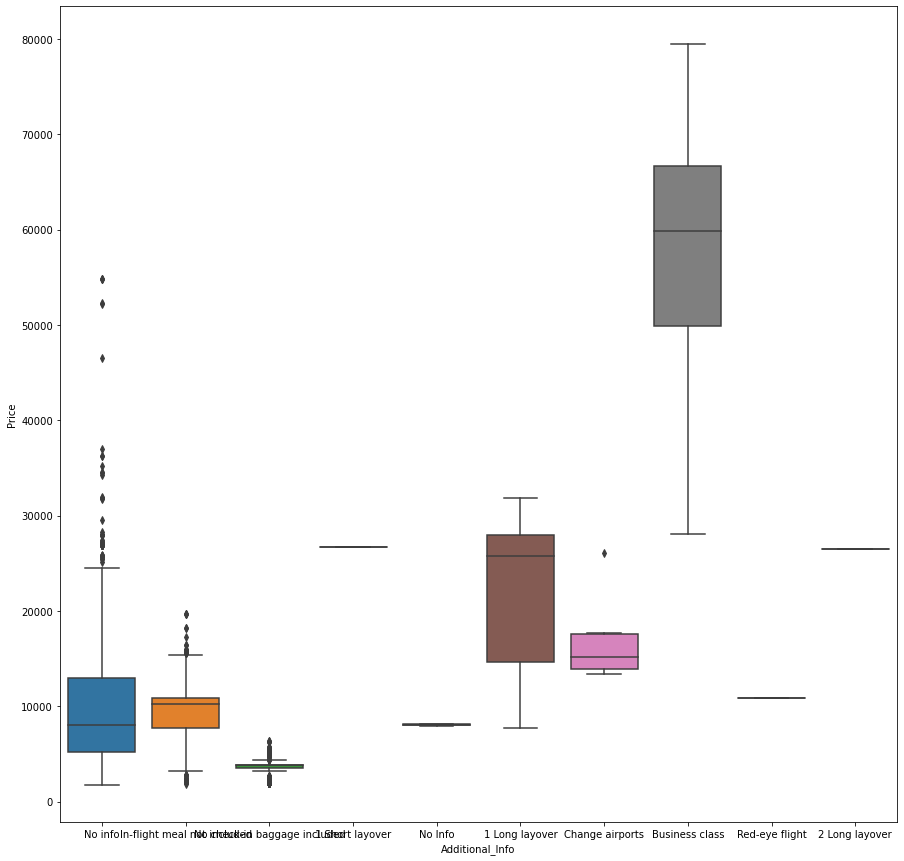

In [44]:
for i in cat:
    plt.figure(figsize=(15,15))
    sns.boxplot(cat[i],df['Price'])
    plt.show()

In [45]:
# lebal and one hot encoding
df=pd.get_dummies(df,columns=['Airline', 'Source', 'Destination'],drop_first=True)

In [43]:
cat.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [46]:
df.head()

,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Timehours,Dep_Timemin,Arrival_Timehours,Arrival_Timemin,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df['Route'].head()

0                BLR → DEL
1    CCU → IXR → BBI → BLR
2    DEL → LKO → BOM → COK
3          CCU → NAG → BLR
4          BLR → NAG → DEL
Name: Route, dtype: object

In [50]:
df['Route'][0].split('→')[0]

'BLR '

In [56]:
df['Route_1']=df['Route'].str.split('→').str[0]
df['Route_2']=df['Route'].str.split('→').str[1]
df['Route_3']=df['Route'].str.split('→').str[2]
df['Route_4']=df['Route'].str.split('→').str[3]
df['Route_5']=df['Route'].str.split('→').str[4]


In [58]:
df.drop('Route',axis=1,inplace=True)
df.head()

,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Timehours,Dep_Timemin,Arrival_Timehours,Arrival_Timemin,Duration_hours,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,non-stop,No info,3897,24,3,22,20,1,10,2,...,0,0,0,0,1,BLR,DEL,NaN,NaN,NaN
1,2 stops,No info,7662,5,1,5,50,13,15,7,...,0,0,0,0,0,CCU,IXR,BBI,BLR,NaN
2,2 stops,No info,13882,6,9,9,25,4,25,19,...,1,0,0,0,0,DEL,LKO,BOM,COK,NaN
3,1 stop,No info,6218,5,12,18,5,23,30,5,...,0,0,0,0,0,CCU,NAG,BLR,NaN,NaN
4,1 stop,No info,13302,3,1,16,50,21,35,4,...,0,0,0,0,1,BLR,NAG,DEL,NaN,NaN


In [59]:
df.isnull().sum()

Total_Stops                                      0
Additional_Info                                  0
Price                                            0
Journey_day                                      0
Journey_month                                    0
Dep_Timehours                                    0
Dep_Timemin                                      0
Arrival_Timehours                                0
Arrival_Timemin                                  0
Duration_hours                                   0
Duration_min                                     0
Airline_Air India                                0
Airline_GoAir                                    0
Airline_IndiGo                                   0
Airline_Jet Airways                              0
Airline_Jet Airways Business                     0
Airline_Multiple carriers                        0
Airline_Multiple carriers Premium economy        0
Airline_SpiceJet                                 0
Airline_Trujet                 

In [60]:
df.fillna('None',inplace=True)

In [61]:
df.isnull().sum()

Total_Stops                                  0
Additional_Info                              0
Price                                        0
Journey_day                                  0
Journey_month                                0
Dep_Timehours                                0
Dep_Timemin                                  0
Arrival_Timehours                            0
Arrival_Timemin                              0
Duration_hours                               0
Duration_min                                 0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vista

In [62]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    print(df[i].nunique())

5
45
30
14
6


 as we will see we have lots of features in Route , one hot encoding will not be a better option lets appply Label Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [64]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    df[i]=encoder.fit_transform(df[i])

In [65]:
df.head()

,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Timehours,Dep_Timemin,Arrival_Timehours,Arrival_Timemin,Duration_hours,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,non-stop,No info,3897,24,3,22,20,1,10,2,...,0,0,0,0,1,0,13,29,13,5
1,2 stops,No info,7662,5,1,5,50,13,15,7,...,0,0,0,0,0,2,25,1,3,5
2,2 stops,No info,13882,6,9,9,25,4,25,19,...,1,0,0,0,0,3,32,4,5,5
3,1 stop,No info,6218,5,12,18,5,23,30,5,...,0,0,0,0,0,2,34,3,13,5
4,1 stop,No info,13302,3,1,16,50,21,35,4,...,0,0,0,0,1,0,34,8,13,5


In [66]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [67]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

dict1={'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
df['Total_Stops']=df['Total_Stops'].map(dict1)

In [69]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [70]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

 Additional_Info contains almost 80% no_info,so we can drop this column


In [71]:
df.drop('Additional_Info',axis=1,inplace=True)

In [72]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Timehours,Dep_Timemin,Arrival_Timehours,Arrival_Timemin,Duration_hours,Duration_min,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,1,0,13,29,13,5
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,0,0,2,25,1,3,5
2,2,13882,6,9,9,25,4,25,19,0,...,1,0,0,0,0,3,32,4,5,5
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,0,0,2,34,3,13,5
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,1,0,34,8,13,5


In [73]:
df.shape

(10682, 35)

In [74]:
num_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Timehours',
 'Dep_Timemin',
 'Arrival_Timehours',
 'Arrival_Timemin',
 'Duration_hours',
 'Duration_min']

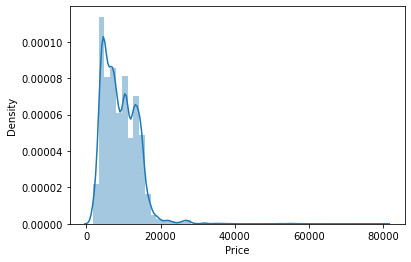

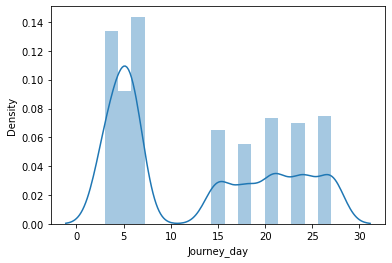

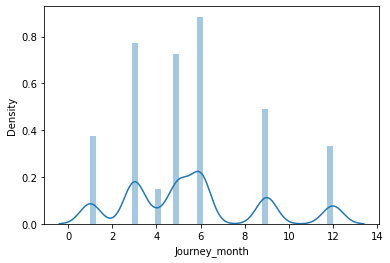

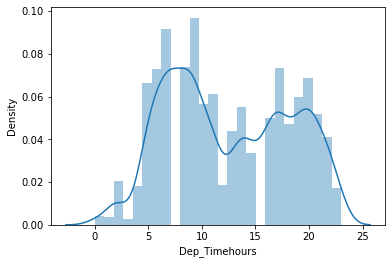

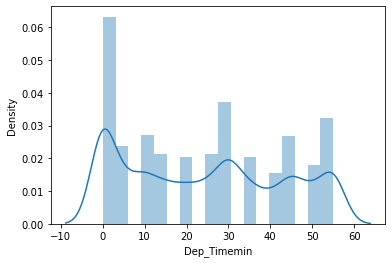

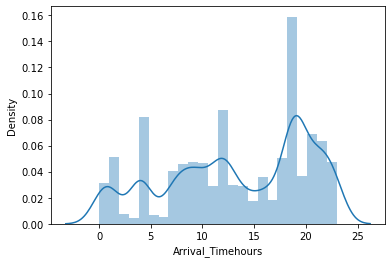

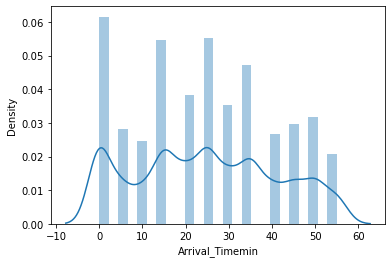

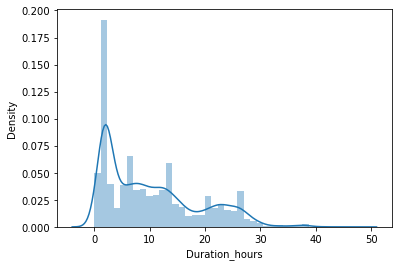

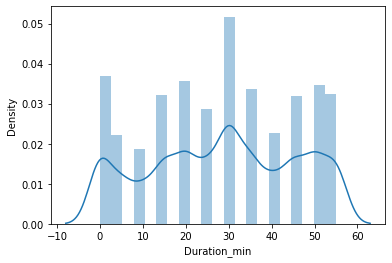

In [75]:
for i in num_col:
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:xlabel='Price'>

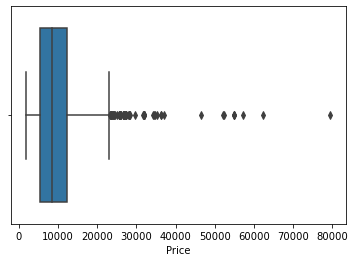

In [76]:
# outliers tretment fill with 0.95% value
sns.boxplot(df['Price'])

In [80]:
df['Price'].quantile(0.99)

22270.0

In [87]:
df['Price']=np.where(df['Price']>30000,22270,df['Price'])

In [88]:
df['Price'].skew()

0.741023108539273

<AxesSubplot:xlabel='Price'>

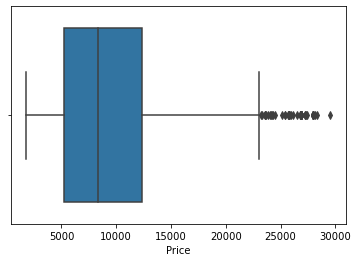

In [89]:
sns.boxplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

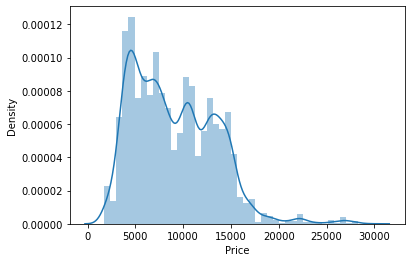

In [90]:
sns.distplot(df['Price'])

In [93]:
x=df.drop('Price',axis=1)
x.shape

(10682, 34)

In [94]:
y=df['Price']

In [96]:
from sklearn.model_selection import train_test_split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [110]:
y_train.head()

508      9345
3071     4773
2036    17261
49      11150
9686     4804
Name: Price, dtype: int64

In [111]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [114]:
def prediction(ml_model):
    model=ml_model.fit(x_train,y_train)
    print('training score :', model.score(x_train,y_train))
    print('\n')
    y_pred=ml_model.predict(x_test)
    print('y_pred', y_pred)
    print('\n')
    print('r2 score : ',r2_score(y_test,y_pred))
    print('\n')
    print('mean_absolute_error score : ',mean_absolute_error(y_test,y_pred))
    print('\n')
    print('mean_squared_error score : ',mean_squared_error(y_test,y_pred))
    print('\n')
    print('Root_mean_squared_error score : ',np.sqrt(mean_squared_error(y_test,y_pred)))
    sns.distplot(y_test-y_pred)
    
    

In [113]:
from sklearn.ensemble import RandomForestRegressor

training score : 0.9560966793910958


y_pred [12471.17416667  6074.27        3560.005      ... 10214.77
 10867.155       3903.87333333]


r2 score :  0.8248982086084126


mean_absolute_error score :  1176.1208094029923


mean_squared_error score :  3469065.7106786743


Root_mean_squared_error score :  1862.5428077439385


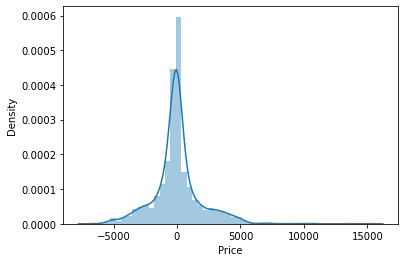

In [115]:
prediction(RandomForestRegressor())

In [116]:

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

training score : 0.6310853909187477


y_pred [11612.54289346  6179.94814258  3064.69180764 ...  9920.94837363
 11685.20483955  4449.89012927]


r2 score :  0.6253162582141101


mean_absolute_error score :  1963.8077916953714


mean_squared_error score :  7423125.204192862


Root_mean_squared_error score :  2724.5412832608836


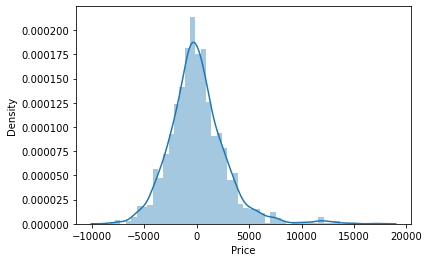

In [117]:
prediction(LinearRegression())

training score : 0.9679385737129547


y_pred [11263.5  5636.   3543.  ...  8446.   9663.   3841. ]


r2 score :  0.7296228784347447


mean_absolute_error score :  1348.1649976602712


mean_squared_error score :  5356632.812947278


Root_mean_squared_error score :  2314.4400646694826


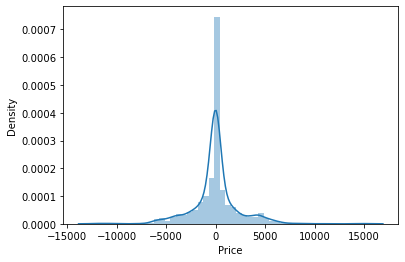

In [119]:
prediction(DecisionTreeRegressor())

training score : 0.7890023862129045


y_pred [12586.6  6164.8  6929.4 ... 12252.6 11789.2  3977.4]


r2 score :  0.6736525124118953


mean_absolute_error score :  1735.773607861488


mean_squared_error score :  6465501.408984558


Root_mean_squared_error score :  2542.7350253191066


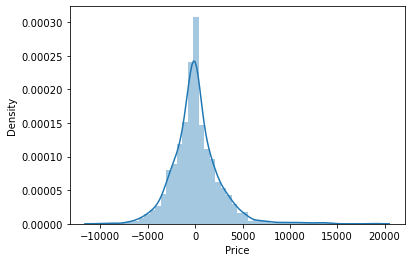

In [120]:
prediction(KNeighborsRegressor())

In [122]:
from sklearn.model_selection import RandomizedSearchCV

In [127]:
random_grid={'n_estimators':np.arange(1,100),'max_features':['auto','sqrt']}

In [124]:
rf=RandomForestRegressor()

In [128]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [129]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   19.6s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   verbose=2)

In [130]:
rf_random.best_params_

{'n_estimators': 73, 'max_features': 'auto'}

In [132]:
prediction=rf_random.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

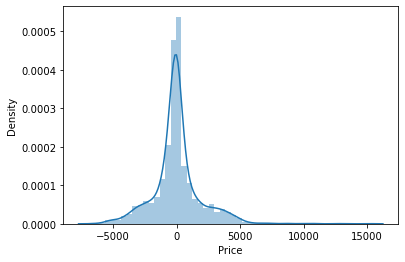

In [133]:
sns.distplot(y_test-prediction)

In [140]:
r2_score(y_test,prediction)

0.8224634830913744

In [139]:
print('MAE',mean_absolute_error(y_test,prediction))
print('MSE',mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(mean_squared_error(y_test,prediction)))

MAE 1185.2062234555563
MSE 3517301.7837590636
RMSE 1875.447089032123


In [147]:
rf_reg=RandomForestRegressor()

In [149]:
reg_model=rf_reg.fit(x_train,y_train)

In [152]:
print('traing score : ', reg_model.score(x_train,y_train))

traing score :  0.9564867190486739


In [154]:
y_predict=reg_model.predict(x_test)

print(y_predict)

[11760.13866667  6065.91        3559.13       ... 10680.75
 11516.2225      3900.244     ]


In [155]:
print('r2_score ', r2_score(y_test,y_predict))
print('MAE',mean_absolute_error(y_test,y_predict))
print('MSE',mean_squared_error(y_test,y_predict))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_predict)))

r2_score  0.822539765009912
MAE 1184.0844830224498
MSE 3515790.5085982517
RMSE 1875.0441351067584


In [158]:
imp=rf_reg.feature_importances_

In [170]:
imp_feature=pd.DataFrame(imp,index=x_train.columns)
imp_feature.columns=['importance']
imp_feature.sort_values(by='importance',ascending=False)

,importance
Duration_hours,0.478038
Journey_day,0.128092
Airline_Jet Airways,0.079114
Journey_month,0.070417
Route_2,0.043714
Airline_Multiple carriers,0.023741
Dep_Timehours,0.021974
Arrival_Timehours,0.020138
Route_4,0.019472
Total_Stops,0.018104
